                                                   **PREPROCESAMIENTO DE DATOS**

Una empresa ha recolectado la información del alquiler de viviendas en Nueva York a través de la aplicación Airbnb durante el año 2019

In [72]:
# importamos las librerias necesarias para el análisis de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**Obtención y almacenamiento del conjunto de datos**  

In [73]:
# Extraemos los datos en un tabla
data_ny=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
data_ny.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [74]:
data_ny.shape

(48895, 16)

El conjunto de datos tiene 48895 filas y 16 columnas

In [75]:
data_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

El conjunto de datos tiene 10 variables numericas y 6 variables categóricas, no cuenta con valores nulos.
Existen algunas variables donde faltan registros considerables pero que puede no afectar su analisis

**LIMPIEZA DEL CONJUNTO DE DATOS**

In [76]:
print(f"El numero de duplicados de name es: {data_ny['name'].duplicated().sum()}")
print(f"El numero de duplicados de host_id es: {data_ny['host_id'].duplicated().sum()}")
print(f"El numero de duplicados de id es: {data_ny['id'].duplicated().sum()}")

El numero de duplicados de name es: 989
El numero de duplicados de host_id es: 11438
El numero de duplicados de id es: 0


In [77]:
data_ny.drop(["id", "name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
data_ny.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [78]:
data_ny.shape
data_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 4.1+ MB


In [86]:
data_ny["room_type"] = pd.factorize(data_ny["room_type"])[0]
data_ny["neighbourhood_group"] = pd.factorize(data_ny["neighbourhood_group"])[0]
data_ny["neighbourhood "] = pd.factorize(data_ny["neighbourhood"])[0]
data_ny["availability_365 "] = pd.factorize(data_ny["availability_365"])[0]

**ANALISIS DESCRIPTIVO**
Obtenemos la media, mediana, desviacion estandar, minimos, maximos y cuartiles de nuestros datos.

In [69]:
data_ny.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


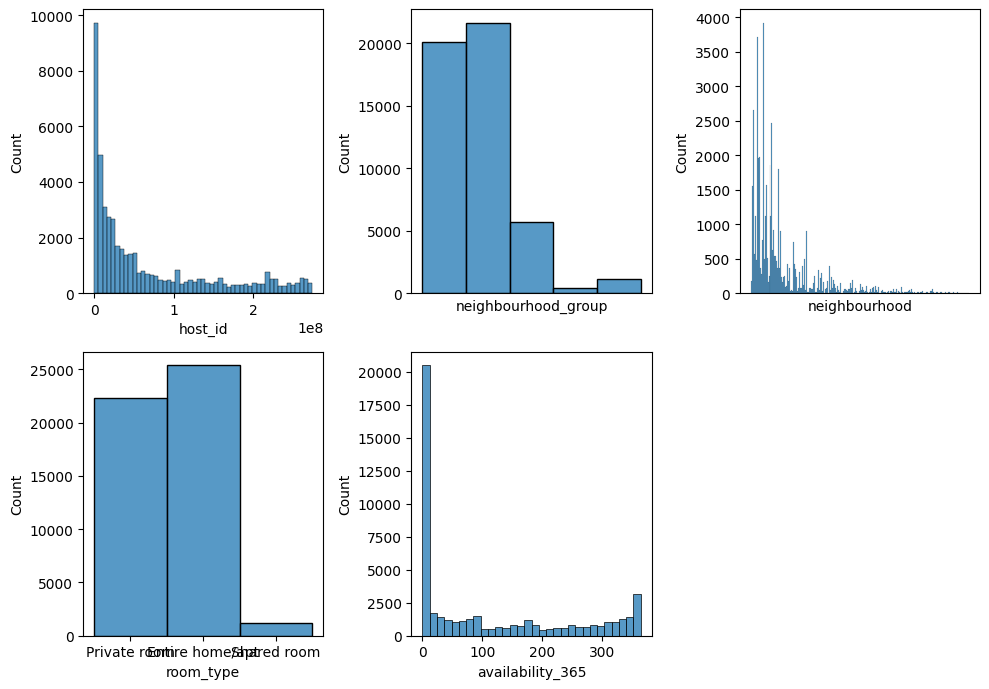

In [61]:
# crearemos las graficas necesarias para
fig, axis = plt.subplots(2, 3, figsize=(10, 7))

# Create Histogram
sns.histplot(ax = axis[0,0], data = data_ny, x = "host_id")
sns.histplot(ax = axis[0,1], data = data_ny, x = "neighbourhood_group").set_xticks([])
sns.histplot(ax = axis[0,2], data = data_ny, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1,0], data = data_ny, x = "room_type")
sns.histplot(ax = axis[1,1], data = data_ny, x = "availability_365")
fig.delaxes(axis[1, 2])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

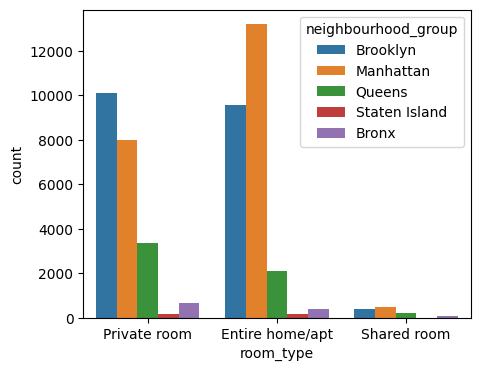

In [64]:

fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = data_ny, x = "room_type", hue = "neighbourhood_group")

# Show the plot
plt.show()

Podemos darnos cuenta de que el tipo de habitacion y los vecindarios estan muy relacionados, Brooklyn y Manhattan son los lugares que mas personas reciben

In [32]:
# Factorizamos los datos categoricos para poder trabajar con ellos y ver la relacion que hay entre ellos.
data_ny["room_type "] = pd.factorize(data_ny["room_type"])[0]


**EDA  ANALISIS EXPLORATORIO DE DATOS**

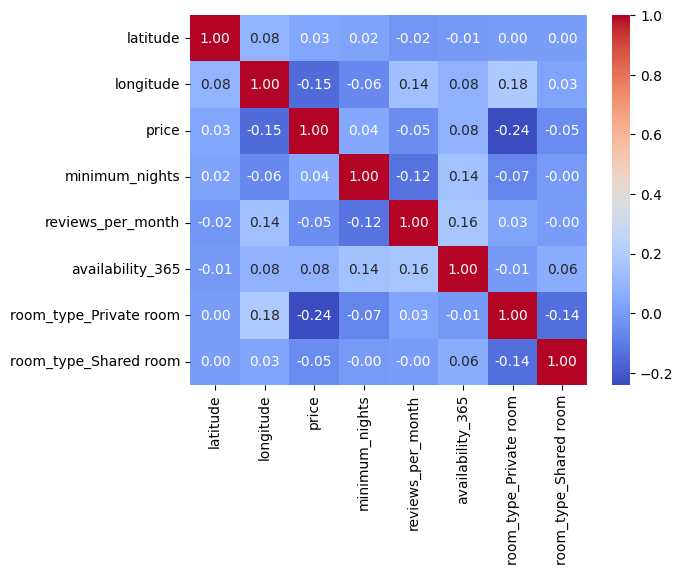

In [40]:
# Reemplazar valores faltantes con 0 o eliminar filas con nulos
data_ny = data_ny.fillna(0)

# Codifica 'room_type' como variables dummy
data_ny_encoded = pd.get_dummies(data_ny, columns=["room_type"], drop_first=True)

# Calcula la correlación
numeric_columns = ["latitude", "longitude", "price", "minimum_nights", "reviews_per_month", "availability_365"] + list(data_ny_encoded.filter(like='room_type_').columns)
corr_matrix = data_ny_encoded[numeric_columns].corr()

# Graficar el heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

Al realizar una tabla de correlacion podemos ver que las variables no estan relacionadas entre ellas, ya que su porcentaje es muy bajo para que impacte en un análisis.

**MODELADO**

Definimos los nombres de las columnas que queramos escalar para que los datos queden en valores de entre el 0 y el 1

In [91]:

from sklearn.preprocessing import MinMaxScaler

num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", "availability_365", "neighbourhood_group", "room_type"]
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(data_ny[num_variables])
df_scal = pd.DataFrame(scal_features, index = data_ny.index, columns = num_variables)
df_scal["price"] = data_ny["price"]
df_scal.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
0,0.014308,0.000000,0.015337,1.000000,0.00,0.0,149
1,0.071542,0.000000,0.003067,0.972603,0.25,0.5,225
2,0.000000,0.001601,0.000000,1.000000,0.25,0.0,150
3,0.429253,0.000000,0.000000,0.531507,0.00,0.5,89
4,0.014308,0.007206,0.000000,0.000000,0.25,0.5,80


Dividimos el conjunto de datos en datos de entranamiento y testeo.

In [ ]:
from sklearn.model_selection import train_test_split

num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", 
                 "availability_365", "neighbourhood_group", "room_type"]

# Dividimos el conjunto de datos en muestras de train y test
X = data_ny.drop("price", axis = 1)[num_variables]
y = data_ny["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()



,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type
32645,11,3,1,1,0,1
23615,2,2,1,0,1,0
31183,0,2,2,0,0,0
29260,87,3,1,267,0,1
7275,13,5,1,0,2,0


Guardar los datos

In [93]:
X_train["price"] = list(y_train)
X_test["price"] = list(y_test)
X_train.to_csv("/workspaces/machine-learning-python-template/data/processed/clean_train.csv", index = False)
X_test.to_csv("/workspaces/machine-learning-python-template/data/processed/clean_test.csv", index = False)